<a href="https://colab.research.google.com/github/gustavo-duarte-silva/NASCAR/blob/main/NASCAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importando bibliotecas para a Analise de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#Dataset Adqurido No Kaggle
df = pd.read_csv('/content/drive/MyDrive/CIENTISTA DE DADOS/PROJETOS/NASCAR/NASCAR_Dataset.csv', )
df.rename(columns= {'Car Manufacturer': 'Car_Manufacturer', 'Car Number':'Car_Number'}, inplace=True)
df.head(15)

,Year,Driver,Car_Number,Car_Manufacturer,Wins
0,1949,Red Byron,22,Oldsmobile,2
1,1950,Bill Rexford,60,Ford,0
2,1950,Bill Rexford,8,Mercury,0
3,1950,Bill Rexford,20,Oldsmobile,0
4,1950,Bill Rexford,59,Oldsmobile,0
5,1950,Bill Rexford,62,Oldsmobile,0
6,1950,Bill Rexford,80,Oldsmobile,0
7,1950,Bill Rexford,60,Oldsmobile,1
8,1951,Herb Thomas,6,Hudson,1
9,1951,Herb Thomas,92,Hudson,4


In [4]:
#Falta informações do Ano de 2017, 2018, 2019, 2020, 2021
#Completando os Dados Faltantes com informações adquiridas no wikipedia
Year = [2017, 2018, 2019, 2020, 2021]
Driver = ['Martin Truex Jr.',	'Joey Logano', 'Kyle Busch', 'Chase Elliott', 'Kyle Larson']
Car_Number = [78, 22, 18, 9, 5]
Car_Manufacturer = ['Toyota', 'Ford', 'Toyota', 'Chevrolet', 'Chevrolet']
Wins = [8, 3, 5, 5, 10]

info_new = {'Year': Year, 'Driver': Driver, 'Car_Number': Car_Number, 'Car_Manufacturer': Car_Manufacturer, 'Wins': Wins}
data_new = pd.DataFrame(data=info_new)
data_new

,Year,Driver,Car_Number,Car_Manufacturer,Wins
0,2017,Martin Truex Jr.,78,Toyota,8
1,2018,Joey Logano,22,Ford,3
2,2019,Kyle Busch,18,Toyota,5
3,2020,Chase Elliott,9,Chevrolet,5
4,2021,Kyle Larson,5,Chevrolet,10


In [5]:
#Falta Informações do campeonato de construtores, onde não é possivel obter nos dados existentes
#Logo, foi obtido as informações no wikipedia

Wins_car = np.array(['None','None','None','Hudson','Hudson','Hudson','Oldsmobile','Ford','Ford','Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet','Pontiac',
            'Ford','Ford','Ford','Ford','Ford','Ford','Ford','Dodge','Plymouth','Chevrolet','Chevrolet','Chevrolet','Dodge',
            'Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Buick','Buick','Chevrolet','Chevrolet','Chevrolet','Chevrolet',
            'Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Ford','Chevrolet','Ford','Chevrolet','Chevrolet','Ford','Chevrolet','Ford','Ford',
            'Chevrolet','Ford','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet','Chevrolet',
            'Chevrolet','Chevrolet','Chevrolet','Toyota','Toyota','Ford','Toyota','Ford','Chevrolet'])
Wins_car

array(['None', 'None', 'None', 'Hudson', 'Hudson', 'Hudson', 'Oldsmobile',
       'Ford', 'Ford', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Pontiac', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford',
       'Dodge', 'Plymouth', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Dodge', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Buick', 'Buick', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Chevrolet', 'Ford', 'Chevrolet', 'Ford', 'Chevrolet',
       'Chevrolet', 'Ford', 'Chevrolet', 'Ford', 'Ford', 'Chevrolet',
       'Ford', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Toyota',
       'Toyota', 'Ford', 'Toyota', 'Ford', 'Chevrolet'], dtype='<U10')

In [6]:
#Concatenando o dataset com novos valores
data_all = pd.concat([df,data_new], ignore_index=True)
data_car = data_all.copy()
data_car = data_car.drop_duplicates(subset='Year', ignore_index=True)
data_car['Winner_Manufacturer'] = Wins_car
data_car.drop([0,1,2], inplace=True)
data_car.reset_index(drop=True, inplace=True)
data_car

,Year,Driver,Car_Number,Car_Manufacturer,Wins,Winner_Manufacturer
0,1952,Tim Flock,91,Hudson,8,Hudson
1,1953,Herb Thomas,92,Hudson,12,Hudson
2,1954,Lee Petty,42,Chrysler,7,Hudson
3,1955,Tim Flock,2,Chevrolet,0,Oldsmobile
4,1956,Buck Baker,0,Chrysler,0,Ford
...,...,...,...,...,...,...
65,2017,Martin Truex Jr.,78,Toyota,8,Toyota
66,2018,Joey Logano,22,Ford,3,Ford
67,2019,Kyle Busch,18,Toyota,5,Toyota
68,2020,Chase Elliott,9,Chevrolet,5,Ford


In [7]:
#Verificando os tipos das variaveis
data_all.dtypes

Year                 int64
Driver              object
Car_Number           int64
Car_Manufacturer    object
Wins                 int64
dtype: object

In [8]:
#O Piloto que Ganhou Mais corridas de 1949-2021
data_all.groupby(by='Driver').apply(lambda x: x.Wins.sum()).sort_values(ascending=False)                                                           

Driver
Richard Petty       93
Jimmie Johnson      46
Dale Earnhardt      44
David Pearson       42
Jeff Gordon         36
Cale Yarborough     28
Darrell Waltrip     27
Tim Flock           26
Lee Petty           25
Buck Baker          24
Herb Thomas         19
Ned Jarrett         14
Tony Stewart        13
Joe Weatherly       12
Bobby Isaac         11
Kyle Busch          10
Kyle Larson         10
Martin Truex Jr.     8
Bill Elliott         6
Bobby Allison        6
Rex White            6
Rusty Wallace        6
Chase Elliott        5
Kevin Harvick        5
Brad Keselowski      5
Bobby Labonte        4
Dale Jarrett         4
Terry Labonte        4
Kurt Busch           3
Joey Logano          3
Red Byron            2
Alan Kulwicki        2
Matt Kenseth         1
Bill Rexford         1
Benny Parsons        1
dtype: int64

In [9]:
#o Piloto que Ganhou mais Campeonatos de 1949 - 2021
data_all.drop_duplicates(subset='Year').Driver.value_counts(ascending=False)

Richard Petty       7
Jimmie Johnson      7
Dale Earnhardt      7
Jeff Gordon         4
Lee Petty           3
Cale Yarborough     3
Tony Stewart        3
David Pearson       3
Darrell Waltrip     3
Tim Flock           2
Herb Thomas         2
Ned Jarrett         2
Kyle Busch          2
Joe Weatherly       2
Terry Labonte       2
Buck Baker          2
Matt Kenseth        1
Rex White           1
Kyle Larson         1
Brad Keselowski     1
Rusty Wallace       1
Bobby Allison       1
Dale Jarrett        1
Joey Logano         1
Kevin Harvick       1
Chase Elliott       1
Benny Parsons       1
Red Byron           1
Kurt Busch          1
Martin Truex Jr.    1
Bobby Isaac         1
Bill Elliott        1
Bill Rexford        1
Alan Kulwicki       1
Bobby Labonte       1
Name: Driver, dtype: int64

In [32]:
#filtrando as informações para a plotagem do grafico, 
pontuacao = 5
corridas = data_all.groupby(by='Driver').apply(lambda x: x.Wins.sum())[data_all.Driver.value_counts() > pontuacao].sort_values(ascending=False)
campeonatos = data_all.drop_duplicates(subset='Year').Driver.value_counts(ascending=False)[data_all.Driver.value_counts() > pontuacao]
names = data_all.Driver.unique()[data_all.Driver.value_counts() > pontuacao]

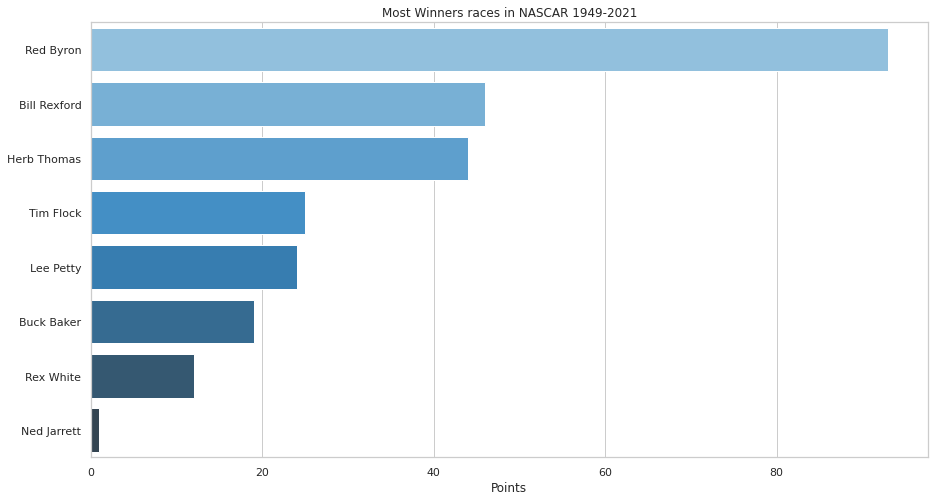

In [45]:
plt.figure(figsize=[15,8])
sns.set_theme(style="whitegrid")
fig = sns.barplot(data = data_all, y=names, x=corridas, palette='Blues_d', saturation = 2) 
fig.set_title('Most Winners races in NASCAR 1949-2021')
fig.set_xlabel('Points')
plt.show()

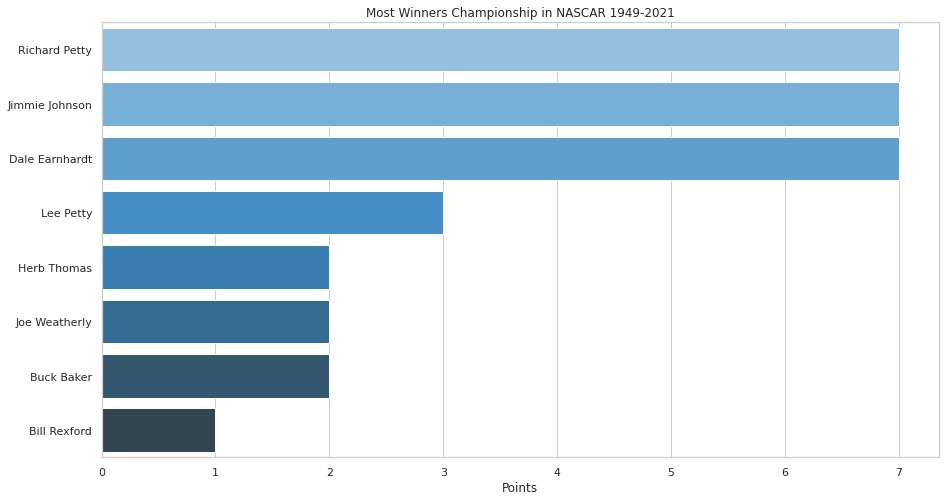

In [46]:
plt.figure(figsize=[15,8])
sns.set_theme(style="whitegrid")
fig01 = sns.barplot(data = data_all, y=campeonatos.index, x=campeonatos, palette='Blues_d', saturation = 2) 
fig01.set_title('Most Winners Championship in NASCAR 1949-2021')
fig01.set_xlabel('Points')
plt.show()

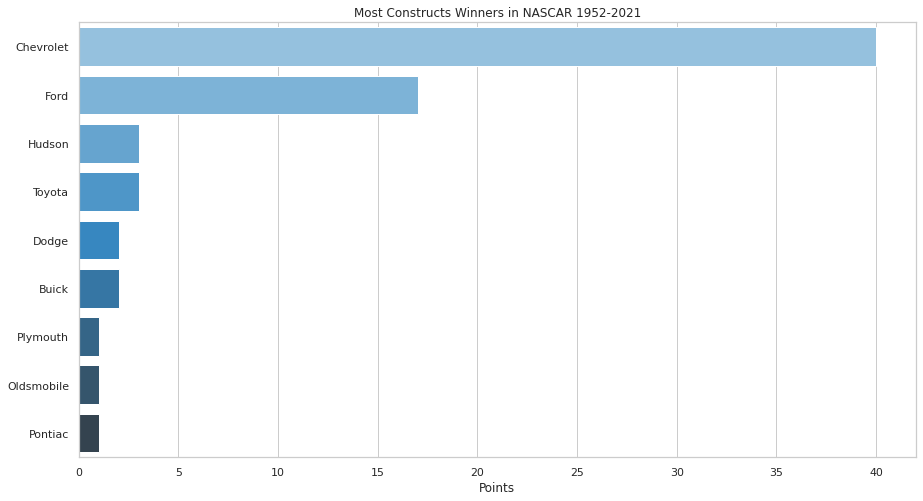

In [49]:
plt.figure(figsize=[15,8])
sns.set_theme(style="whitegrid")
fig02 = sns.barplot(data = data_car, y = data_car.Winner_Manufacturer.value_counts().index, 
                    x= data_car.Winner_Manufacturer.value_counts(),
                    palette='Blues_d', saturation = 2)

fig02.set_title('Most Constructs Winners in NASCAR 1952-2021')
fig02.set_xlabel('Points')
plt.show()